In [1]:
%load_ext autoreload
%autoreload 2

# Example usage of DeepLabCut -analysis

## Extract positions on a video using a trained model

Open anaconda prompt and `activate deeplabcut` and navigate to the DeepLabCut folder:

`cd Documents\apps\DeepLabCut-master\Analysis-tools`

Then you need to set a couple of environment variables:
`set TF_CUDNN_USE_AUTOTUNE=0`
`set CUDA_VISIBLE_DEVICES=0`

Crop the videos using ....

Now we are ready to run the DeepLabCut model on the new video.

Place all the videos you want to analyse in `DeepLabCut-master/videos`. Check the settings in `DeepLabCut-master/myconfig_analysis.py`.

Now run AnalyzeVideos:

`python AnalyzeVideos.py`

The output labels should be saved in the video as csv files and can be uploaded in Python

In [14]:
from DLC_tools import DLCsv
import numpy as np
import matplotlib.pylab as plt

In [3]:
local_file = DLCsv('hello.csv', upper_boarder=150, lower_boarder=50, boarder_orr='hor')

150


C:\Users\cinpla\Documents\apps\DeepLabCutAnalysis\DLC_tools.py:223: RuntimeWarning: invalid value encountered in greater_equal
  bad_values = deque(np.greater_equal(ele_dif, dif_thresh))


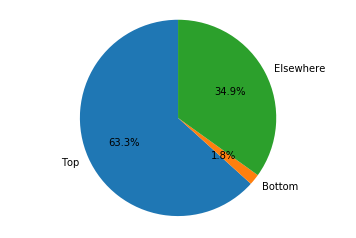

In [6]:
local_file.position_preference(plot=True)

In [7]:
local_file.raw_df

bodyparts        nose                               tail              \
coords              x           y likelihood           x           y   
0           70.430375  268.520622   1.000000  150.784341  169.741632   
1           79.634946  274.224509   1.000000  150.391590  170.428616   
2           86.839390  275.628998   1.000000  152.741621  173.419641   
3           95.829772  282.457248   1.000000  155.048632  173.393182   
4          100.601439  289.294962   1.000000  157.232482  174.768683   
5          107.484939  300.715000   1.000000  154.862497  177.266722   
6          113.443850  315.234425   1.000000  149.841165  182.836999   
7          112.796370  325.041836   1.000000  142.747945  189.785362   
8          113.518991  336.060237   1.000000  136.006449  197.384469   
9          119.608248  341.857875   1.000000  130.417202  204.181394   
10         125.136376  352.548640   1.000000  125.705392  216.346776   
11         127.444152  359.948561   1.000000  126.074901  223.067528   
12         132.613251  365.267308   1.000000  129.683602  226.760786   
13         140.233751  361.724799   1.000000  135.376969  231.739288   
14         147.294683  364.917253   1.000000  136.853903  232.001415   
15         150.640132  364.159476   1.000000  138.001326  231.820165   
16         153.118958  363.702600   1.000000  137.383889  231.920729   
17         158.582824  364.795954   0.999999  137.101613  232.083569   
18         160.930484  365.470468   1.000000  136.032899  235.536328   
19         170.100245  363.837743   1.000000  135.242736  238.637880   
20         173.684041  364.333364   1.000000  133.292712  240.982060   
21         173.732555  364.994006   1.000000  130.289636  244.997626   
22         179.211020  364.700998   1.000000  127.992738  247.628408   
23         184.750916  357.508528   1.000000  124.768897  248.368606   
24         187.320213  357.388668   1.000000  122.489764  251.131588   
25         190.066253  358.601799   0.970713  122.421158  251.862361   
26         124.204412  256.667551   0.000972  121.623239  253.503750   
27         189.149830  362.131409   0.046838  121.922145  255.435878   
28         189.667967  362.325011   0.205967  122.161266  256.721083   
29         187.757080  363.322740   0.990606  121.426584  257.409523   
...               ...         ...        ...         ...         ...   
9010        43.994092  348.817904   1.000000  102.364027  217.005853   
9011        39.046339  357.876666   1.000000   97.651733  220.778769   
9012        40.917881  365.339479   0.898073   98.031546  226.891542   
9013        36.467082  366.554683   0.999525   92.380964  230.753649   
9014        38.485990  366.618240   0.999904   90.161814  234.129296   
9015        36.992269  367.878018   0.999927   87.369384  237.290143   
9016        46.594764  365.946064   0.978367   84.899649  241.094288   
9017        50.278639  367.660018   0.999998   84.105788  243.891298   
9018        54.089797  368.130332   1.000000   89.260805  246.054471   
9019        56.118664  368.002655   0.997478   94.416579  247.279931   
9020        63.265642  367.762323   1.000000   98.753112  246.068173   
9021        63.477498  368.223136   1.000000   99.938279  245.231033   
9022        60.686078  369.646011   1.000000   98.946784  245.802937   
9023        61.543623  369.980725   1.000000   95.140214  246.962208   
9024        62.895981  368.665018   1.000000   94.258792  246.771716   
9025        62.502455  369.279673   1.000000   94.804028  245.530309   
9026        61.721051  369.810812   0.999997   95.565887  242.470517   
9027        57.946784  371.121083   1.000000   93.545291  240.406496   
9028        56.768062  371.323505   0.999999   91.890268  239.020904   
9029        57.566718  372.061502   1.000000   91.199307  239.571023   
9030        57.402601  372.098479   1.000000   93.250213  241.253896   
9031        57.498724  371.839343   1.000000   92.004181  240.828813   
9032        57.637950  371.581450   1.00

In [26]:
local_file.interpolated_df

C:\Users\cinpla\Documents\apps\DeepLabCutAnalysis\DLC_tools.py:223: RuntimeWarning: invalid value encountered in greater_equal
  bad_values = deque(np.greater_equal(ele_dif, dif_thresh))


bodyparts        nose                               tail              \
coords              x           y likelihood           x           y   
0           70.430375  268.520622   1.000000  150.784341  169.741632   
1           79.634946  274.224509   1.000000  150.391590  170.428616   
2           86.839390  275.628998   1.000000  152.741621  173.419641   
3           95.829772  282.457248   1.000000  155.048632  173.393182   
4          100.601439  289.294962   1.000000  157.232482  174.768683   
5          107.484939  300.715000   1.000000  154.862497  177.266722   
6          113.443850  315.234425   1.000000  149.841165  182.836999   
7          112.796370  325.041836   1.000000  142.747945  189.785362   
8          113.518991  336.060237   1.000000  136.006449  197.384469   
9          119.608248  341.857875   1.000000  130.417202  204.181394   
10         125.136376  352.548640   1.000000  125.705392  216.346776   
11         127.444152  359.948561   1.000000  126.074901  223.067528   
12         132.613251  365.267308   1.000000  129.683602  226.760786   
13         140.233751  361.724799   1.000000  135.376969  231.739288   
14         147.294683  364.917253   1.000000  136.853903  232.001415   
15         150.640132  364.159476   1.000000  138.001326  231.820165   
16         153.118958  363.702600   1.000000  137.383889  231.920729   
17         158.582824  364.795954   0.999999  137.101613  232.083569   
18         160.930484  365.470468   1.000000  136.032899  235.536328   
19         170.100245  363.837743   1.000000  135.242736  238.637880   
20         173.684041  364.333364   1.000000  133.292712  240.982060   
21         173.732555  364.994006   1.000000  130.289636  244.997626   
22         179.211020  364.700998   1.000000  127.992738  247.628408   
23         184.750916  357.508528   1.000000  124.768897  248.368606   
24         187.320213  357.388668   1.000000  122.489764  251.131588   
25         190.066253  358.601799   0.970713  122.421158  251.862361   
26         190.907005  359.576629   0.000972  121.623239  253.503750   
27         190.467025  361.388854   0.046838  121.922145  255.435878   
28         189.414012  362.726307   0.205967  122.161266  256.721083   
29         187.757080  363.322740   0.990606  121.426584  257.409523   
...               ...         ...        ...         ...         ...   
9010        43.994092  348.817904   1.000000  102.364027  217.005853   
9011        39.046339  357.876666   1.000000   97.651733  220.778769   
9012        37.062303  363.311498   0.898073   98.031546  226.891542   
9013        36.467082  366.554683   0.999525   92.380964  230.753649   
9014        38.485990  366.618240   0.999904   90.161814  234.129296   
9015        36.992269  367.878018   0.999927   87.369384  237.290143   
9016        46.594764  365.946064   0.978367   84.899649  241.094288   
9017        50.278639  367.660018   0.999998   84.105788  243.891298   
9018        54.089797  368.130332   1.000000   89.260805  246.054471   
9019        56.118664  368.002655   0.997478   94.416579  247.279931   
9020        63.265642  367.762323   1.000000   98.753112  246.068173   
9021        63.477498  368.223136   1.000000   99.938279  245.231033   
9022        60.686078  369.646011   1.000000   98.946784  245.802937   
9023        61.543623  369.980725   1.000000   95.140214  246.962208   
9024        62.895981  368.665018   1.000000   94.258792  246.771716   
9025        62.502455  369.279673   1.000000   94.804028  245.530309   
9026        61.721051  369.810812   0.999997   95.565887  242.470517   
9027        57.946784  371.121083   1.000000   93.545291  240.406496   
9028        56.768062  371.323505   0.999999   91.890268  239.020904   
9029        57.566718  372.061502   1.000000   91.199307  239.571023   
9030        57.402601  372.098479   1.000000   93.250213  241.253896   
9031        57.498724  371.839343   1.000000   92.004181  240.828813   
9032        57.637950  371.581450   1.00

In [23]:
times = local_file.raw_df.index

In [11]:
np.sum(np.isnan(local_file.cleaned_df.nose.x))

C:\Users\cinpla\Documents\apps\DeepLabCutAnalysis\DLC_tools.py:223: RuntimeWarning: invalid value encountered in greater_equal
  bad_values = deque(np.greater_equal(ele_dif, dif_thresh))


973

In [ ]:
import matplotlib.pylab as plt


plt.show()

In [12]:
x_t = local_file.raw_df['tail']['x']
y_t = local_file.raw_df['tail']['y']

x_n = local_file.raw_df['nose']['x']
y_n = local_file.raw_df['nose']['y']

x_tc = local_file.cleaned_df['tail']['x']
y_tc = local_file.cleaned_df['tail']['y']

x_nc = local_file.cleaned_df['nose']['x']
y_nc = local_file.cleaned_df['nose']['y']

C:\Users\cinpla\Documents\apps\DeepLabCutAnalysis\DLC_tools.py:223: RuntimeWarning: invalid value encountered in greater_equal
  bad_values = deque(np.greater_equal(ele_dif, dif_thresh))


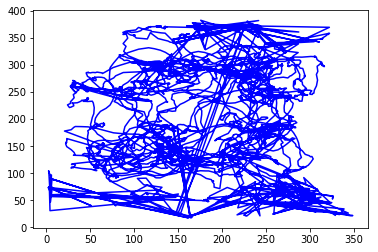

In [16]:
plt.plot(x_t, y_t, 'b')

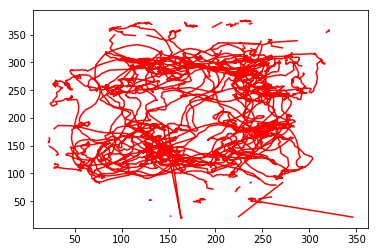

In [17]:
plt.plot(x_tc, y_tc, 'r')

In [27]:
x_ti = local_file.interpolated_df['tail']['x']
y_ti = local_file.interpolated_df['tail']['y']

x_ni = local_file.interpolated_df['nose']['x']
y_ni = local_file.interpolated_df['nose']['y']

C:\Users\cinpla\Documents\apps\DeepLabCutAnalysis\DLC_tools.py:223: RuntimeWarning: invalid value encountered in greater_equal
  bad_values = deque(np.greater_equal(ele_dif, dif_thresh))


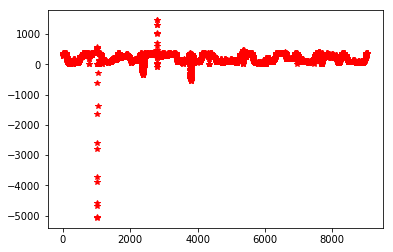

In [29]:
plt.plot(times, y_ni, 'r*')

In [ ]:
lhnose = local_file.df['nose'].likelihood

In [ ]:
idxs = np.where(lhnose > 0.999)
fil_x_n = x_n[idxs[0]]
fil_y_n = y_n[idxs[0]]
plt.plot(fil_x_n/np.max(fil_x_n), fil_y_n/np.max(fil_y_n))

In [ ]:
local_filet = DLCsv('hello.csv', video_file=True, boarder_orr='hor')

In [ ]:
%debug

> c:\users\cinpla\anaconda3\envs\dlc\lib\re.py(183)search()
    181     """Scan through string looking for a match to the pattern, returning
    182     a Match object, or None if no match was found."""
--> 183     return _compile(pattern, flags).search(string)
    184 
    185 def sub(pattern, repl, string, count=0, flags=0):

ipdb> filename
*** NameError: name 'filename' is not defined
